In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv('test.csv')

In [3]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [4]:
data.dtypes


tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

In [5]:
for column in data.select_dtypes(include=['float64']).columns:
    data[column] = data[column].astype('float32')

In [6]:
data.shape

(2947, 563)

In [7]:
data.size

1659161

In [8]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [9]:
df_null_columns = data.loc[:, pd.isnull(data).any(axis=0)]
df_null_columns.head()


""
0
1
2
3
4


In [10]:
df_null_row = data[pd.isnull(data).any(axis=1)]
df_null_row

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity


In [11]:
data['Activity'].value_counts()

Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float32(561), int64(1), object(1)
memory usage: 6.4+ MB


In [13]:
data.describe().style.format('{:.2f}')


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float32(561), int64(1), object(1)
memory usage: 6.4+ MB


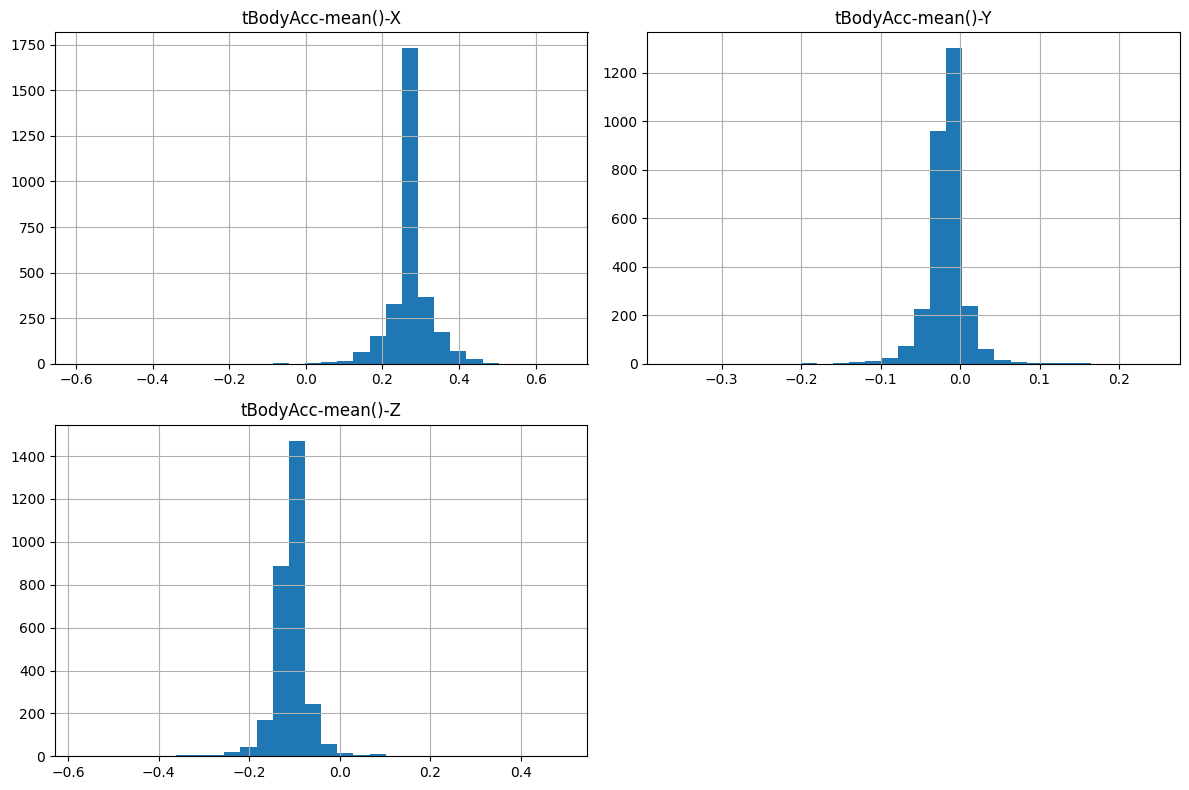

In [15]:
numeric_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']

data[numeric_features].hist(figsize=(12, 8), bins=30)
plt.tight_layout()



<Figure size 1200x800 with 0 Axes>

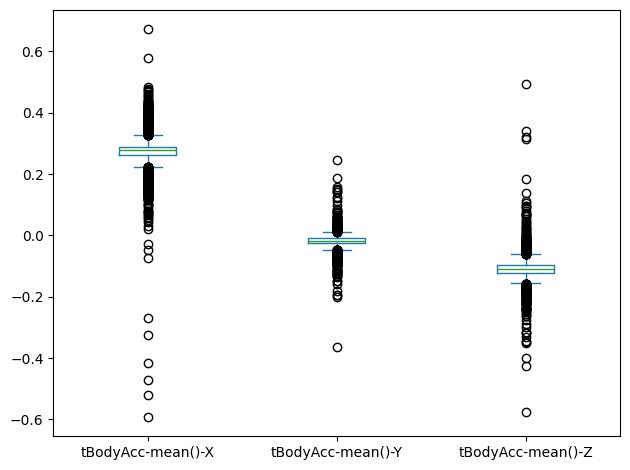

In [16]:
plt.figure(figsize=(12, 8))
data[numeric_features].plot(kind='box')
plt.tight_layout()


In [21]:
LAYING_data = data[data['Activity'] == 'LAYING']

STANDING_data = data[data['Activity'] == 'STANDING']

WALKING_data = data[data['Activity'] == 'WALKING']

SITTING_data = data[data['Activity'] == 'SITTING']

WALKING_UPSTAIRS_data = data[data['Activity'] == 'WALKING_UPSTAIRS']

WALKING_DOWNSTAIRS_data = data[data['Activity'] == 'WALKING_DOWNSTAIRS']


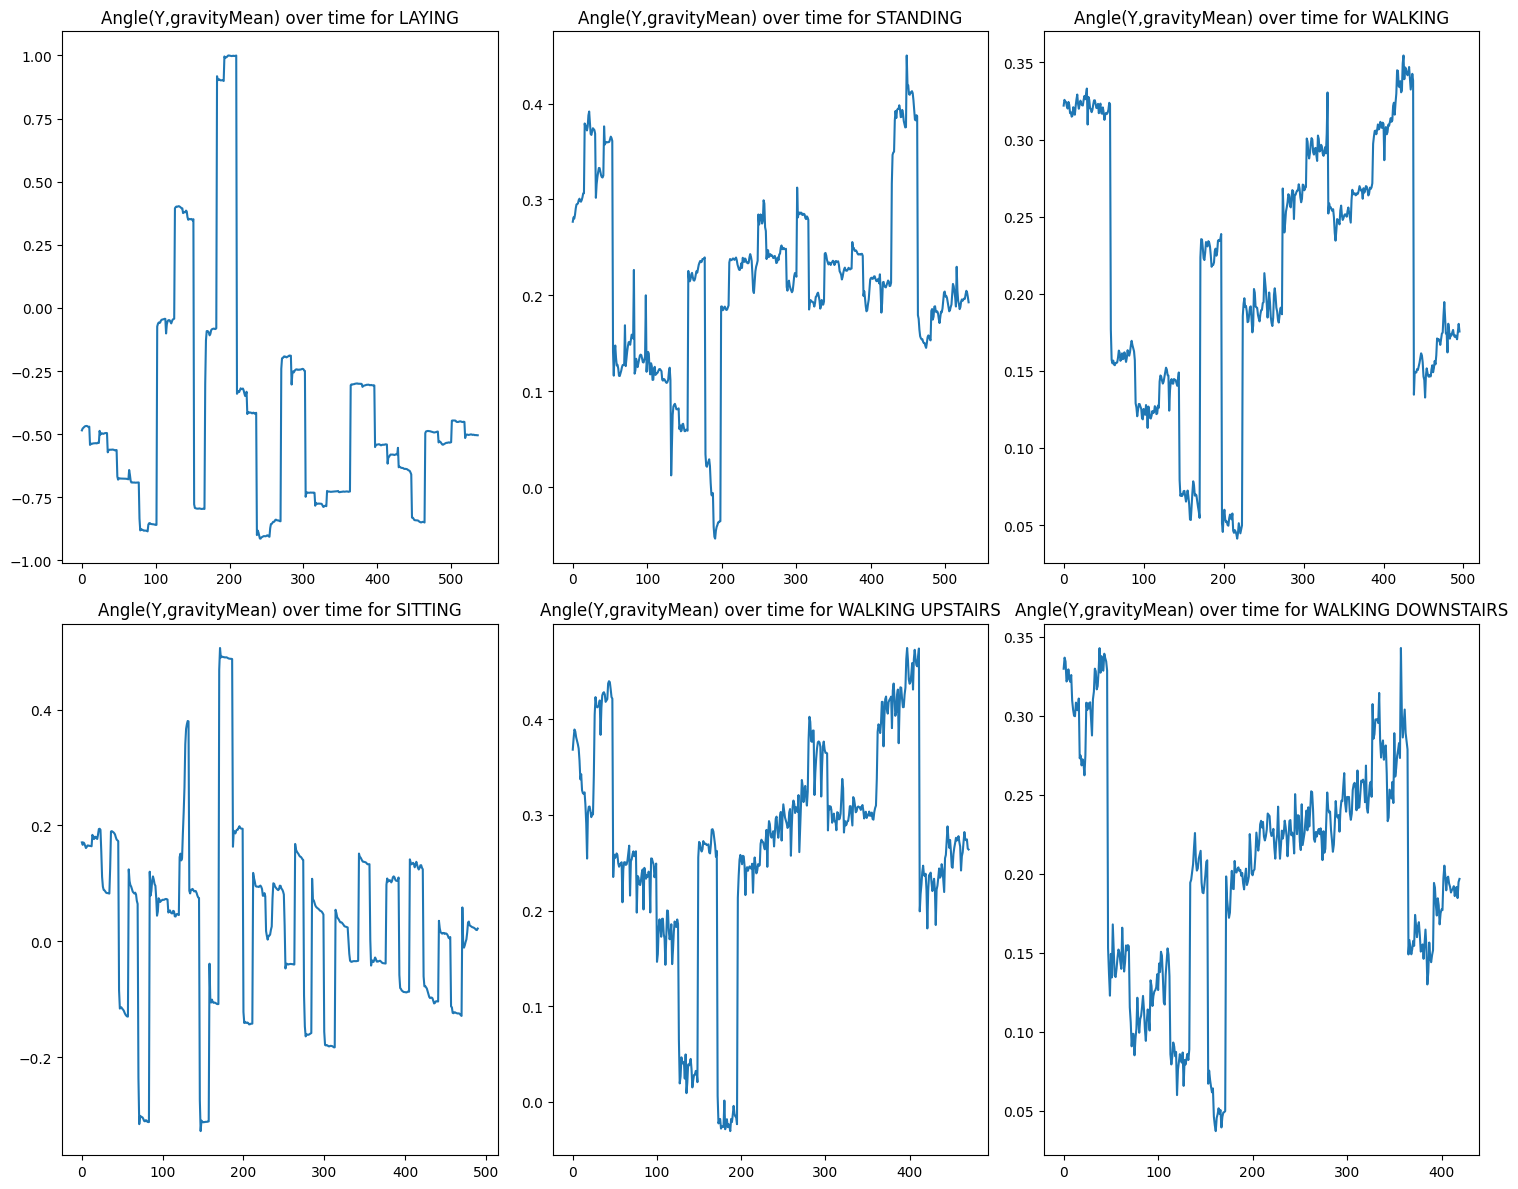

In [22]:
time_laying = range(len(LAYING_data))

time_standing = range(len(STANDING_data))

time_walking = range(len(WALKING_data))

time_sitting = range(len(SITTING_data))

time_UPSTAIRS_data = range(len(WALKING_UPSTAIRS_data))

time_DOWNSTAIRS_data = range(len(WALKING_DOWNSTAIRS_data))

fig, ax = plt.subplots(figsize=(15, 12), nrows=2, ncols=3)

ax[0, 0].plot(time_laying, LAYING_data['angle(Y,gravityMean)'])
ax[0, 0].set_title('Angle(Y,gravityMean) over time for LAYING')

ax[0, 1].plot(time_standing, STANDING_data['angle(Y,gravityMean)'])
ax[0, 1].set_title('Angle(Y,gravityMean) over time for STANDING')


ax[0, 2].plot(time_walking, WALKING_data['angle(Y,gravityMean)'])
ax[0, 2].set_title('Angle(Y,gravityMean) over time for WALKING')

ax[1, 0].plot(time_sitting, SITTING_data['angle(Y,gravityMean)'])
ax[1, 0].set_title('Angle(Y,gravityMean) over time for SITTING')

ax[1, 1].plot(time_UPSTAIRS_data, WALKING_UPSTAIRS_data['angle(Y,gravityMean)'])
ax[1, 1].set_title('Angle(Y,gravityMean) over time for WALKING UPSTAIRS')

ax[1, 2].plot(time_DOWNSTAIRS_data, WALKING_DOWNSTAIRS_data['angle(Y,gravityMean)'])
ax[1, 2].set_title('Angle(Y,gravityMean) over time for WALKING DOWNSTAIRS')

plt.tight_layout()



In [23]:
data_angle = data.groupby([ 'Activity'])['angle(Y,gravityMean)'].agg(['min', 'max', 'std']).reset_index()
data_angle

,Activity,min,max,std
0,LAYING,-0.913704,1.000000,0.438125
1,SITTING,-0.327444,0.506131,0.156750
2,STANDING,-0.053666,0.450164,0.091985
3,WALKING,0.041204,0.354491,0.085103
4,WALKING_DOWNSTAIRS,0.037238,0.342938,0.071961
5,WALKING_UPSTAIRS,-0.030610,0.474656,0.112322


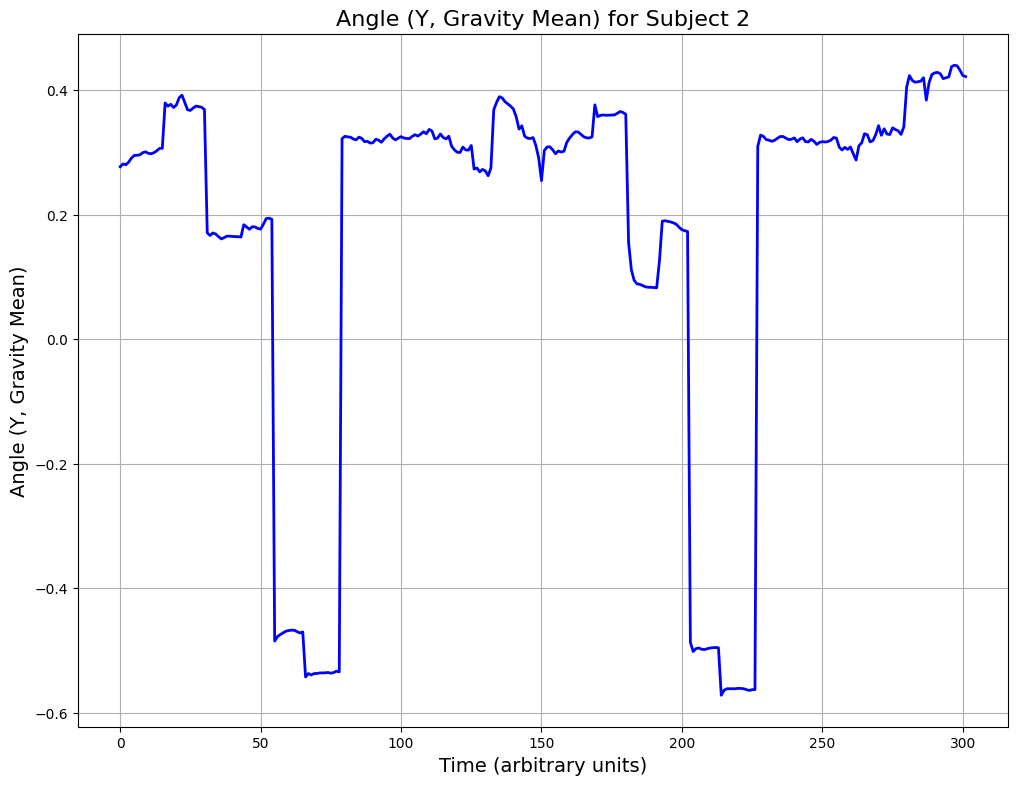

In [24]:

subject_pattern_2 = pd.DataFrame(data)

subject_pattern_2 = subject_pattern_2[subject_pattern_2['subject'] == 2].copy()

time = range(len(subject_pattern_2['Activity']))

fig, ax = plt.subplots(figsize=(12, 9))

ax.plot(time, subject_pattern_2['angle(Y,gravityMean)'], color='blue', linestyle='-', linewidth=2, label='Angle(Y,gravityMean)')
ax.set_title('Angle (Y, Gravity Mean) for Subject 2', fontsize=16)

ax.set_xlabel('Time (arbitrary units)', fontsize=14)

ax.set_ylabel('Angle (Y, Gravity Mean)', fontsize=14)

ax.grid(True)



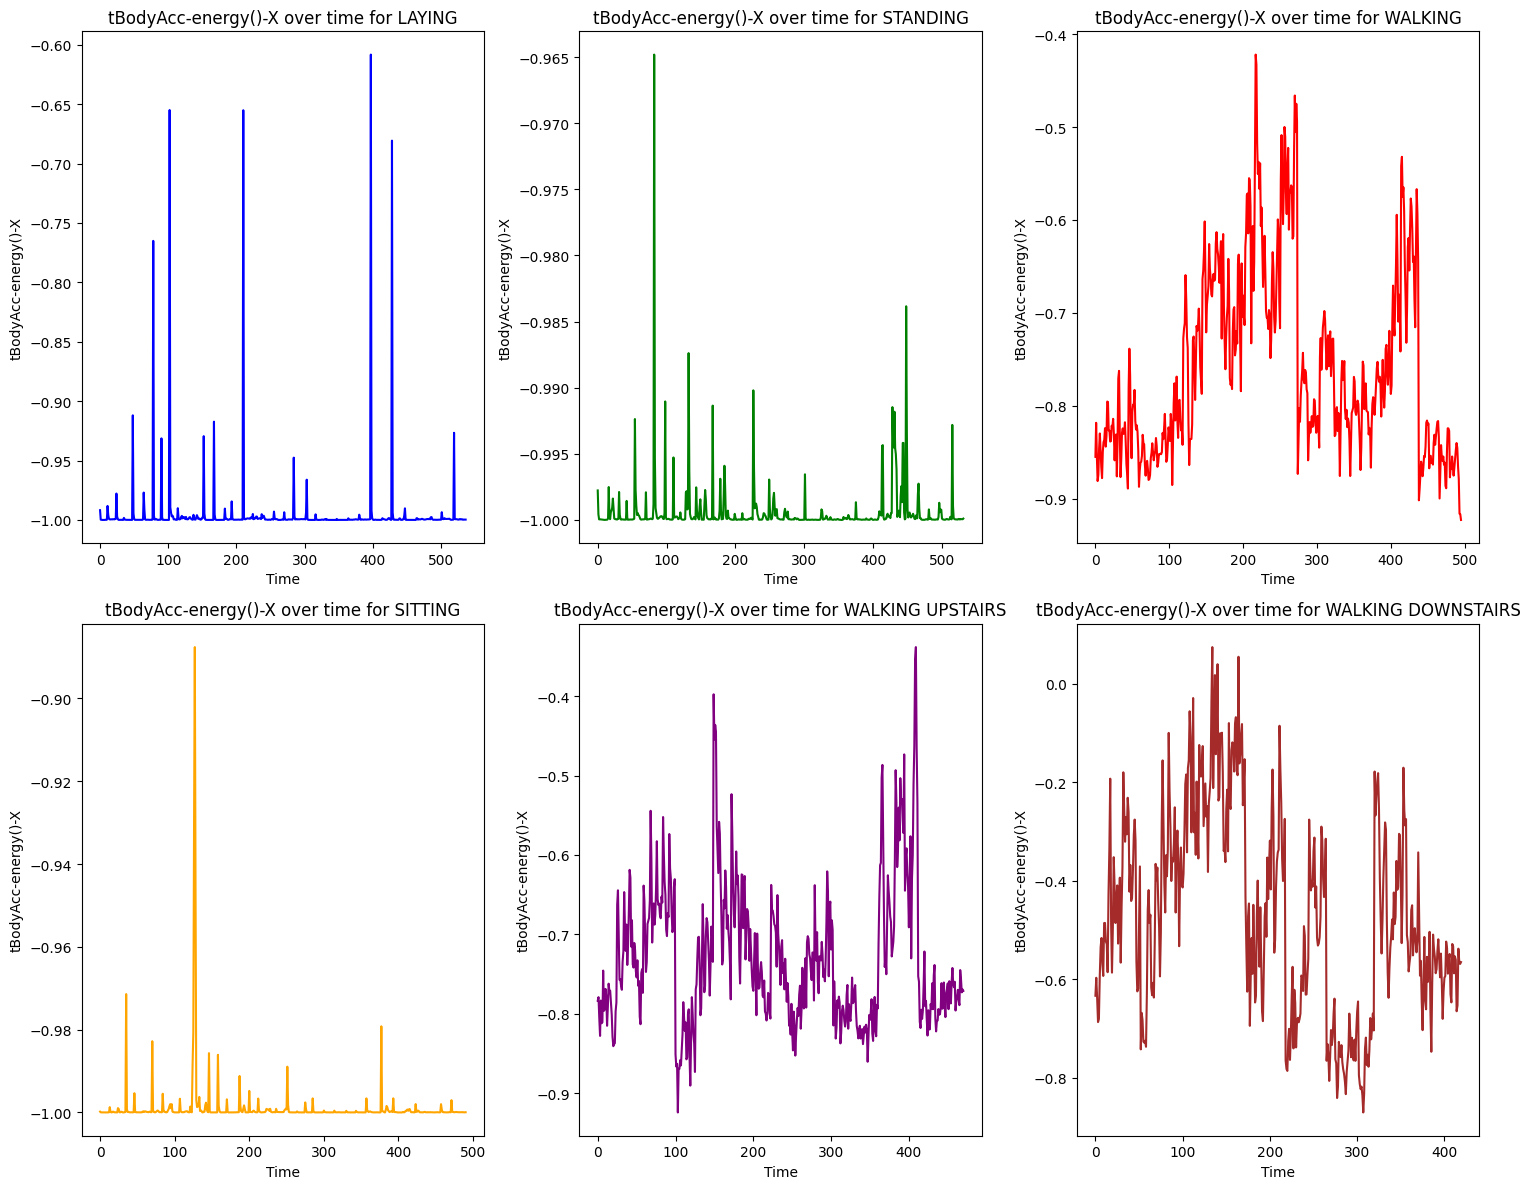

In [25]:

fig, ax = plt.subplots(figsize=(15, 12), nrows=2, ncols=3 )

ax[0, 0].plot(time_laying, LAYING_data['tBodyAcc-energy()-X'], color='blue')

ax[0, 0].set_title('tBodyAcc-energy()-X over time for LAYING')

ax[0, 0].set_xlabel('Time')

ax[0, 0].set_ylabel('tBodyAcc-energy()-X')

ax[0, 1].plot(time_standing, STANDING_data['tBodyAcc-energy()-X'], color='green')

ax[0, 1].set_title('tBodyAcc-energy()-X over time for STANDING')

ax[0, 1].set_xlabel('Time')

ax[0, 1].set_ylabel('tBodyAcc-energy()-X')

ax[0, 2].plot(time_walking, WALKING_data['tBodyAcc-energy()-X'], color='red')

ax[0, 2].set_title('tBodyAcc-energy()-X over time for WALKING')

ax[0, 2].set_xlabel('Time')

ax[0, 2].set_ylabel('tBodyAcc-energy()-X')

ax[1, 0].plot(time_sitting, SITTING_data['tBodyAcc-energy()-X'], color='orange')

ax[1, 0].set_title('tBodyAcc-energy()-X over time for SITTING')

ax[1, 0].set_xlabel('Time')

ax[1, 0].set_ylabel('tBodyAcc-energy()-X')

ax[1, 1].plot(time_UPSTAIRS_data, WALKING_UPSTAIRS_data['tBodyAcc-energy()-X'], color='purple')

ax[1, 1].set_title('tBodyAcc-energy()-X over time for WALKING UPSTAIRS')

ax[1, 1].set_xlabel('Time')

ax[1, 1].set_ylabel('tBodyAcc-energy()-X')

ax[1, 2].plot(time_DOWNSTAIRS_data, WALKING_DOWNSTAIRS_data['tBodyAcc-energy()-X'], color='brown')

ax[1, 2].set_title('tBodyAcc-energy()-X over time for WALKING DOWNSTAIRS')

ax[1, 2].set_xlabel('Time')

ax[1, 2].set_ylabel('tBodyAcc-energy()-X')

plt.tight_layout()


In [24]:
data_acc = data.groupby([ 'Activity'])['tBodyAcc-energy()-X'].agg(['min', 'max', 'std']).reset_index()
data_acc

,Activity,min,max,std
0,LAYING,-0.999994,-0.608346,0.032677
1,SITTING,-0.999999,-0.887594,0.006804
2,STANDING,-0.999998,-0.964817,0.002177
3,WALKING,-0.922686,-0.422103,0.100049
4,WALKING_DOWNSTAIRS,-0.870621,0.074741,0.202354
5,WALKING_UPSTAIRS,-0.924139,-0.338376,0.088711
